# 量子回路モデル

これまでは量子ビットが1つの場合と複数の場合でそれぞれ分けて説明しましたが量子回路と使うとそれぞれの場合のゲートをビジュアルで表現することができます．<br>
ビジュアルで回路を描き，実際の量子コンピュータを使用したり，シミュレーターを使用できたりするPythonのライブラリは様々なものが開発されています．我々の教材では[Qiskit](https://www.ibm.com/quantum/qiskit)と呼ばれるIBMが開発しているツールを駆使して説明していきます．

## 量子回路の描きかた
量子ビットが2つある場合を考えます．
### step 1 (量子ビットを配置する．)
まずは以下の図のように横に線を引きます．

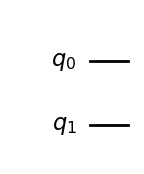

In [1]:
import qiskit
from qiskit import QuantumCircuit
from qiskit_aer import Aer

qc = QuantumCircuit(2)
qc.draw('mpl',style = "clifford")

$q_0$は1つ目の量子ビットであり，$q_1$は2つ目の量子ビットになります．なお，何もゲートなどを作用させてないこの状態では，それぞれ$|0\rangle$の状態で初期化されており，この場合の全体の状態は$|00\rangle$になっています．

### step 2 (量子ゲートを作用させる．)
作用させたい量子ゲートを量子ビットに作用させます．<br>
作用させたい量子ゲートは左から順に書いていきます．
例えば，1つ目の量子ビットに$X$ゲート，$Y$ゲートを順に作用させて，2つ目の量子ビットに$Z$ゲートを作用させる場合を考えると以下のようになります：

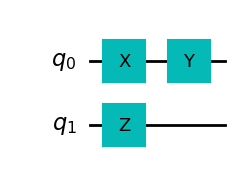

In [2]:
qc = QuantumCircuit(2)
qc.x(0)
qc.y(0)
qc.z(1)
qc.draw('mpl',style = "clifford")

他にも2量子ビットのゲートであるCNOTゲートを作用させた場合は以下のような図になります．なお，1つ目の量子ビット$q_0$が制御量子ビット，2つ目の量子ビット$q_1$がターゲット量子ビットにしており，ターゲット量子は$+$のようなマークがついていることが分かります．

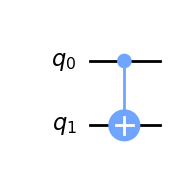

In [3]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw('mpl',style = "clifford")

### step 3 (測定する．)
最後に重要となるのは測定です．前のセクションで説明したように，量子ビットは測定を行うと量子状態が壊れ，$0$か$1$どちらかの情報になります．つまり，測定を行った結果そのデータは量子状態ではないため，古典的な情報を保持する媒体に保存されるため，**古典ビット**と呼ばれる$0$か$1$かの情報に変換されます．<br>
そこで，測定を行う場合は量子ビットだけではなく古典ビットが必要です．古典ビットを以下の$c$のように二重線で表します．また，$c$に書いている$2$という数字は古典ビットの数です．今回は$2$ビットなので，古典ビットは$00,01,10,11$の4つの古典ビットが格納されています．<br>
なお，以下で行っている測定は実際の量子コンピュータではなくシミュレーターを使っています．

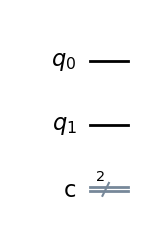

In [4]:
qc = QuantumCircuit(2,2)
qc.draw('mpl',style = "clifford")

そして量子ビットの測定を行った場合以下の図のように量子ビットの情報が古典ビットに受けわされる様子が描かれます．

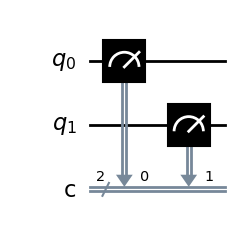

In [5]:
qc = QuantumCircuit(2,2)
qc.measure(0,0)
qc.measure(1,1)
qc.draw('mpl',style = "clifford")

そして測定を$1000$回行った結果の古典ビットを見てみるとたしかに$00$が$1000$回得られていることが分かります．

In [6]:
backend = Aer.get_backend('qasm_simulator') # the device to run on
result = backend.run(qc, shots=1000).result()
counts  = result.get_counts(qc)
print(counts)

{'00': 1000}


そして量子ゲートを作用させて以下の状態を生成し測定を行う場合を考えてみましょう：
\begin{align}
|\psi\rangle = \frac{1}{\sqrt{2}}( |00\rangle + |11\rangle ).
\end{align}
この状態を生成する方法は1つ目の量子ビットに$H$ゲートを作用させて，1つ目の量子ビットを制御量子ビット，2つ目の量子ビットをターゲット量子ビットとしてCNOTゲートを作用させることで実現できます．測定まで行った場合の一連の量子回路を図示すると以下の通りになります．

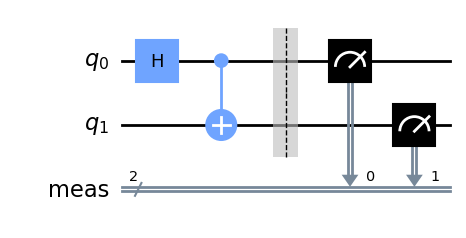

In [7]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw('mpl',style = "clifford")

そして実際に測定を行うと，たしかに$00,11$のみが約半分ずつ得られ，たしかに状態が生成できていることが分かります．

In [8]:
backend = Aer.get_backend('qasm_simulator') # the device to run on
result = backend.run(qc, shots=1000).result()
counts  = result.get_counts(qc)
print(counts)

{'00': 502, '11': 498}
